In [12]:
import sys
sys.path.insert(0, "/Users/nicoladilillo/Projects_mac/lettuce_spectral_signature")
from cars_model import CARS
import os

In [13]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_SVN/CARS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = CARS(path, MAX_COMPONENTS=10, col_group=col_group, calibration=False, cutoff=0.5)

Training samples: 157
	Class Healty: 82 samples
	Class Unhealty: 75 samples
Testing samples: 39
	Class Healty: 20 samples
	Class Unhealty: 19 samples


In [14]:
c.compute_survived_wavelengths_best_score()
c.plot_survived_df


,Wavelengths,count
0,400.000,0.0
1,401.000,3.0
2,402.000,1.0
3,403.000,1.0
4,404.000,2.0
...,...,...
2096,2496.000,4.0
2097,2497.000,4.0
2098,2498.000,6.0
2099,2499.000,3.0



Total combinations to test: 1

Combination 0: ['400.000', '401.000', '402.000', '403.000', '404.000', '405.000', '406.000', '407.000', '408.000', '409.000', '410.000', '411.000', '412.000', '413.000', '414.000', '415.000', '416.000', '417.000', '418.000', '419.000', '420.000', '421.000', '422.000', '423.000', '424.000', '425.000', '426.000', '427.000', '428.000', '429.000', '430.000', '431.000', '432.000', '433.000', '434.000', '435.000', '436.000', '437.000', '438.000', '439.000', '440.000', '441.000', '442.000', '443.000', '444.000', '445.000', '446.000', '447.000', '448.000', '449.000', '450.000', '451.000', '452.000', '453.000', '454.000', '455.000', '456.000', '457.000', '458.000', '459.000', '460.000', '461.000', '462.000', '463.000', '464.000', '465.000', '466.000', '467.000', '468.000', '469.000', '470.000', '471.000', '472.000', '473.000', '474.000', '475.000', '476.000', '477.000', '478.000', '479.000', '480.000', '481.000', '482.000', '483.000', '484.000', '485.000', '486.0

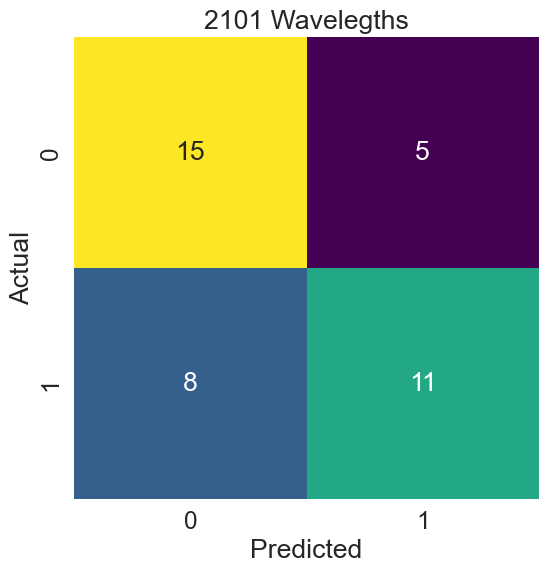

In [15]:
c.set_svm_values()
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=True, model_type='SVM', wavelengths=None, learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)

In [16]:
import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = stress_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

Mismatched: [('19-Jul-2023', 'Healty', 60, 168), ('20-Jun-2023', 'Healty', 40, 97), ('28-Jun-2023', 'Healty', 40, 115), ('20-Jun-2023', 'Healty', 40, 95), ('28-Jun-2023', 'Healty', 40, 110), ('27-Jul-2023', 'Unhealty', 60, 209), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 66), ('28-Jun-2023', 'Unhealty', 40, 123), ('17-May-2023', 'Unhealty', 20, 68), ('17-May-2023', 'Unhealty', 20, 51), ('19-Jul-2023', 'Unhealty', 60, 155), ('26-Apr-2023', 'Unhealty', 20, 11)]
Corresponding Stress_weight values:
 Index([60, 20, 20, 40, 20, 20, 60, 20], dtype='int64', name='Stress_weight')



Total combinations to test: 1

Combination 0: ['400.000', '401.000', '402.000', '403.000', '404.000', '405.000', '406.000', '407.000', '408.000', '409.000', '410.000', '411.000', '412.000', '413.000', '414.000', '415.000', '416.000', '417.000', '418.000', '419.000', '420.000', '421.000', '422.000', '423.000', '424.000', '425.000', '426.000', '427.000', '428.000', '429.000', '430.000', '431.000', '432.000', '433.000', '434.000', '435.000', '436.000', '437.000', '438.000', '439.000', '440.000', '441.000', '442.000', '443.000', '444.000', '445.000', '446.000', '447.000', '448.000', '449.000', '450.000', '451.000', '452.000', '453.000', '454.000', '455.000', '456.000', '457.000', '458.000', '459.000', '460.000', '461.000', '462.000', '463.000', '464.000', '465.000', '466.000', '467.000', '468.000', '469.000', '470.000', '471.000', '472.000', '473.000', '474.000', '475.000', '476.000', '477.000', '478.000', '479.000', '480.000', '481.000', '482.000', '483.000', '484.000', '485.000', '486.0

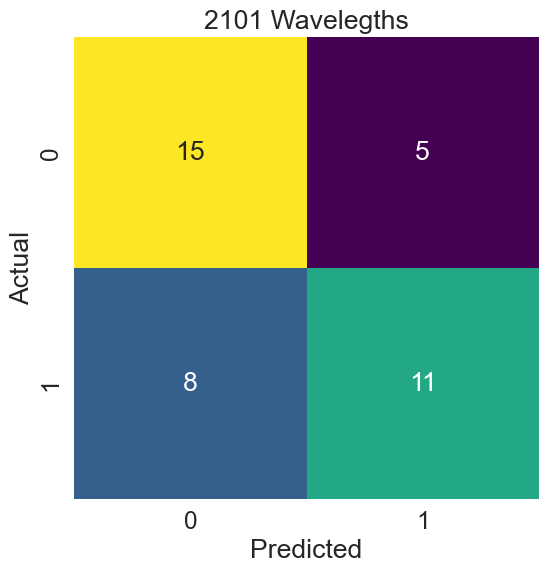

In [17]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=True, learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)

In [18]:
import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = stress_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

Mismatched: [('19-Jul-2023', 'Healty', 60, 168), ('20-Jun-2023', 'Healty', 40, 97), ('20-Jun-2023', 'Healty', 40, 95), ('19-Jul-2023', 'Healty', 60, 146), ('19-Jul-2023', 'Healty', 60, 164), ('27-Jul-2023', 'Unhealty', 60, 209), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 66), ('28-Jun-2023', 'Unhealty', 40, 123), ('17-May-2023', 'Unhealty', 20, 68), ('17-May-2023', 'Unhealty', 20, 51), ('19-Jul-2023', 'Unhealty', 60, 155), ('26-Apr-2023', 'Unhealty', 20, 11)]
Corresponding Stress_weight values:
 Index([60, 20, 20, 40, 20, 20, 60, 20], dtype='int64', name='Stress_weight')


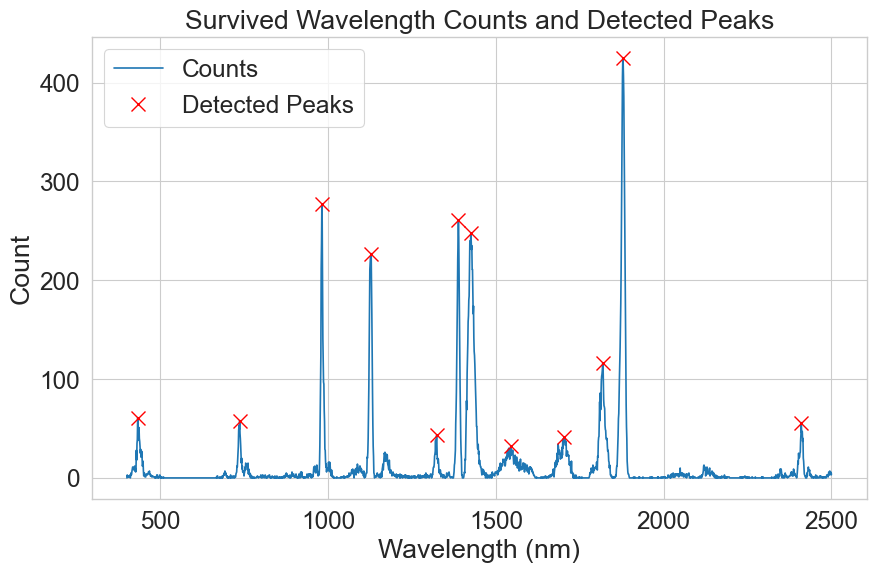

Peak-detected indices using SciPy: [1478, 581, 988, 1025, 728, 1418, 32, 336, 2010, 923, 1304, 1144]

Total combinations to test: 1

Combination 0: ['1878.000', '981.000', '1388.000', '1425.000', '1128.000', '1818.000', '432.000', '736.000', '2410.000', '1323.000', '1704.000', '1544.000']
Number of wavelengths: 12
Accuracy: 0.77, Recall: 0.63, Precision: 0.86, F1: 0.73 , nLV: 9, Cutoff: 0.50

False & 12 & 0.77 & 0.63 & 0.86 & 0.73  & 9.00  & 0.50 \\ \hline



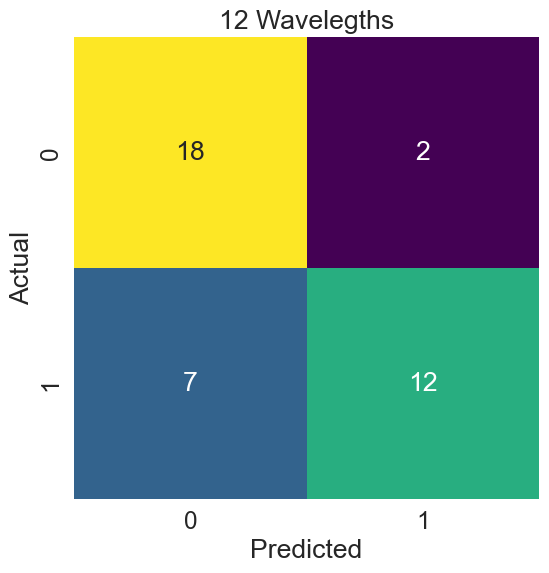

In [ ]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=None, learning_curve=False, pls_plot=False, peak_detection=True, peak_distance=30, peak_height=20, confusion_matrix_f=True)

In [20]:
import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = stress_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

Mismatched: [('19-Jul-2023', 'Healty', 60, 168), ('20-Jun-2023', 'Healty', 40, 97), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 66), ('28-Jun-2023', 'Unhealty', 40, 123), ('17-May-2023', 'Unhealty', 20, 68), ('17-May-2023', 'Unhealty', 20, 51), ('19-Jul-2023', 'Unhealty', 60, 155), ('26-Apr-2023', 'Unhealty', 20, 11)]
Corresponding Stress_weight values:
 Index([20, 20, 40, 20, 20, 60, 20], dtype='int64', name='Stress_weight')


In [21]:
# for i in l:
#     print(len(i))
#     c.permutation_test(wavelengths=i)